# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

#### (1) I sampling a uniform distribution in [0,1]

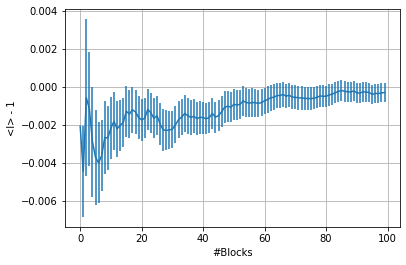

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 100 # Number of blocks
prog_average = np.loadtxt("../data/EX02_1(1).dat", usecols=0)
prog_error = np.loadtxt("../data/EX02_1(1).dat", usecols=1)
x=np.arange(0,N) 

plt.errorbar(x, prog_average - 1, yerr=prog_error)
plt.xlabel('#Blocks')
plt.ylabel('<I> - 1')
plt.grid(True)
plt.show()

#### (2) Using Importance Sampling
To use importance sampling a choose a pdf similar to my integrand $f(x)$ on $[0,1]$ to estimate $I$ obtaining:
$$
I = \int_0^1 \frac{f(x)}{w(x)}w(x) dx = <\frac{f(x)}{w(x)}>_{w(x)} = 1.
$$
Choosing $ w(x) = \frac{1}{\pi-1}(\pi-3x^2) $ we can see that the two function are similar on the interval of interest:

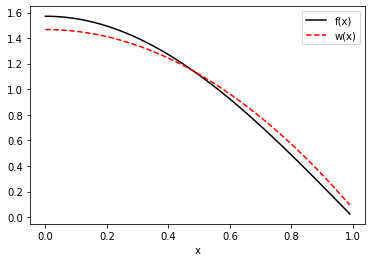

In [21]:
t2 = np.arange(0.0, 1.0, 0.01)

#plt.figure()
plt.plot(t2, (np.pi/2)*np.cos(np.pi/2*t2), 'k', label='f(x)')
plt.plot(t2, 1/(np.pi-1)*(np.pi -3*t2**2), 'r--', label='w(x)')
plt.legend(loc="upper right")
plt.xlabel('x')

plt.show()

In this way I get:
$$
I \approx \frac{1}{N}\sum_{i=0}^N \frac{f(x_i)}{w(x_i)} = \frac{1}{N}\sum_{i=0}^N \frac{\pi(\pi-1)}{2}\frac{cos(\frac{\pi}{2}x_i)}{(\pi-3x_i^2)},
$$
where $x_i$ are random variables drawn from a uniform distribution  in [0,1].

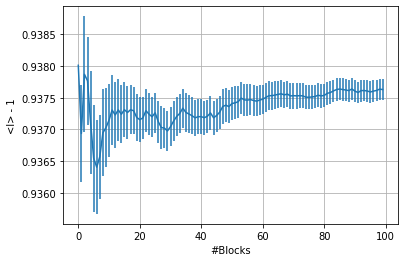

In [12]:
prog_average = np.loadtxt("../data/EX02_1(2).dat", usecols=0)
prog_error = np.loadtxt("../data/EX02_1(2).dat", usecols=1)

plt.errorbar(x, prog_average , yerr=prog_error)
plt.xlabel('#Blocks')
plt.ylabel('<I> - 1')
plt.grid(True)
plt.show()

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

#### (1) Random Walk on a cubic lattice

k of the fit =  [0.92892895]


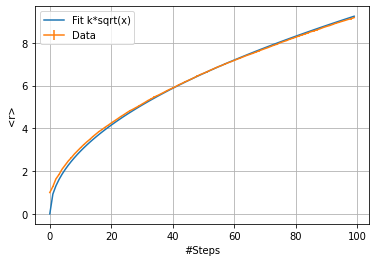

In [12]:
from scipy import optimize

def test_func(x, k):
    return k * np.sqrt(x)
                                               
N = 100 # Number of steps
prog_distance = np.loadtxt("../data/EX02_2(1).dat", usecols=0)
distance_error = np.loadtxt("../data/EX02_2(1).dat", usecols=1)
steps_number = np.arange(0,N) 

params, params_covariance = optimize.curve_fit(test_func, steps_number, prog_distance)
print("k of the fit = ", params)

plt.plot(steps_number, test_func(steps_number, params), label="Fit k*sqrt(x)")
plt.errorbar(x, prog_average, yerr=prog_error, label="Data")
plt.legend(loc="upper left")

plt.xlabel('#Steps')
plt.ylabel('<r>')
plt.grid(True)
plt.show()